In [1]:
import numpy as np

def J(U, A, fx):
    """
    Calcule la fonctionnelle discrétisée J_n.
    
    Paramètres :
        U  : ndarray, vecteur des composantes u_i (taille n).
        A  : ndarray, matrice tridiagonale associée au terme quadratique (taille n x n).
        fx : ndarray, valeurs de f(x_i) (taille n).
    
    
    Retour :
        J_n(U) : float, valeur de la fonctionnelle.
    """
    n = len(U) - 2
    h = 1 / (n+1)

   # Calcul du premier terme : (2/h) * sum((U[i+1] - U[i])**2)
    term1 = (2 / h) * np.sum((U[1:] - U[:-1])**2)

    # Calcul du second terme : -(2/h) * sum(f(x[i-1]) * U[i-1] + f(x[i]) * U[i])
    term2 = -(h / 2) * np.sum(fx[:-1] * U[:-1] + fx[1:] * U[1:])

    # Somme des deux termes
    return term1 + term2


def DJ(U, A, fx):
    """
    Calcule le gradient de la fonctionnelle J_n.
    
    Paramètres :
        U  : ndarray, vecteur des composantes u_i (taille n).
        A  : ndarray, matrice tridiagonale associée au terme quadratique (taille n x n).
        fx : ndarray, valeurs de f(x_i) (taille n).
        
    
    Retour :
        ∇J_n(U) : ndarray, gradient de la fonctionnelle (taille n).
    """
    n = len(U) - 2
    h = 1 / (n+1)
    grad = np.zeros.like(U)                                                                                                                          
    for k in range(1, n):
        grad[k] = (4 / h) * ((U[k] - U[k - 1]) - (U[k + 1] - U[k]))  - (2 / h) * (fx[k - 1] + fx[k])

    
    return grad

Résolution avec f(x) = 1
Optimization terminated successfully    (Exit mode 0)
            Current function value: -424.9999999967861
            Iterations: 106
            Function evaluations: 305
            Gradient evaluations: 106


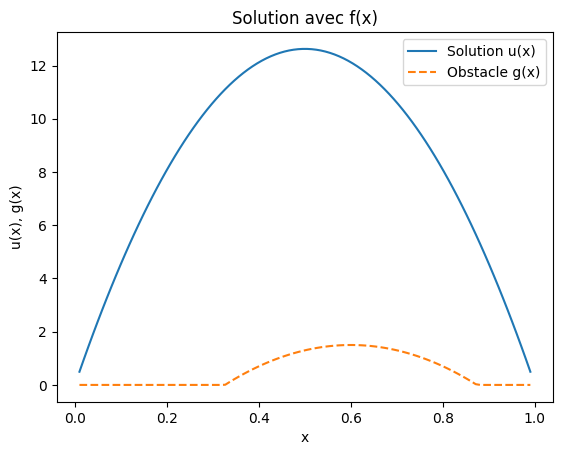

Résolution avec f(x) = π^2 sin(πx)
Optimization terminated successfully    (Exit mode 0)
            Current function value: -25171.988078117232
            Iterations: 4
            Function evaluations: 4
            Gradient evaluations: 4


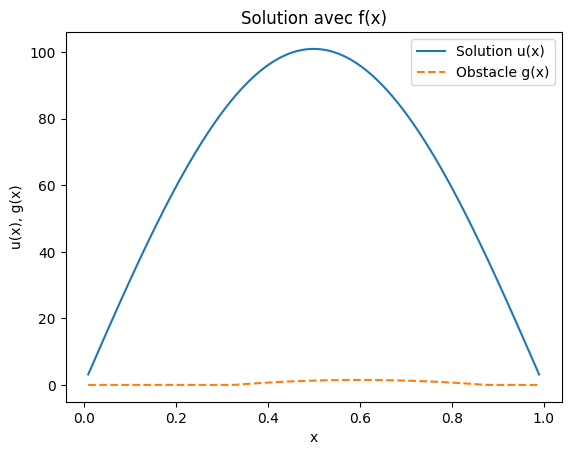

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Définir les fonctions f et g
def f1(x):
    return np.ones_like(x)

def f2(x):
    return (np.pi ** 2) * np.sin(np.pi * x)

def g(x):
    return np.maximum(1.5 - 20 * (x - 0.6) ** 2, 0)

# Définir la fonction J(u) et son gradient DJ(u)
# Définir la fonction J(u) et son gradient DJ(u)
def J(u, A, fx):
    return 0.5 * np.dot(u,np.dot(A,u)) - np.dot( fx , u)

def DJ(u, A, fx):
    return np.dot(A,u) - fx

# Paramètres
n = 100
x = np.linspace(0, 1, n + 2)
xv = x[1:-1]  # Points internes

def solve_and_plot(f):
    # Calculer f(xv) et g(xv)
    fv = f(xv)
    gv = g(xv)

    # Matrice A pour l'approximation des dérivées secondes
    A = (n + 1) * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))

    # Fonctions pour scipy.optimize.minimize
    Jf = lambda u: J(u, A, fv)
    DJf = lambda u: DJ(u, A, fv)

    # Contraintes : u ≥ g(xv)
    const = ({'type': 'ineq', 'fun': lambda u: u - gv, 'jac': lambda u: np.eye(np.size(u))})

    # Initialisation
    u0 = np.zeros(n)

    # Résolution du problème d'optimisation
    res = minimize(Jf, u0, method='SLSQP', jac=DJf, constraints=const, tol=1e-8, options={'disp': True, 'maxiter': 5000})

    # Affichage des résultats
    plt.plot(xv, res.x, label="Solution u(x)")
    plt.plot(xv, gv, label="Obstacle g(x)", linestyle="--")
    plt.xlabel("x")
    plt.ylabel("u(x), g(x)")
    plt.legend()
    plt.title(f"Solution avec f(x)")
    plt.show()

# Résolution pour f(x) = 1
print("Résolution avec f(x) = 1")
solve_and_plot(f1)

# Résolution pour f(x) = π^2 sin(πx)
print("Résolution avec f(x) = π^2 sin(πx)")
solve_and_plot(f2)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -424.9999999967861
            Iterations: 106
            Function evaluations: 305
            Gradient evaluations: 106


<>:80: SyntaxWarning: invalid escape sequence '\p'
<>:84: SyntaxWarning: invalid escape sequence '\p'
<>:80: SyntaxWarning: invalid escape sequence '\p'
<>:84: SyntaxWarning: invalid escape sequence '\p'
C:\Users\21625\AppData\Local\Temp\ipykernel_21756\368396953.py:80: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(xv, solution_sin, label="Solution $u(x)$ (f(x) = $\pi^2 \sin(\pi x)$)", linewidth=2)
C:\Users\21625\AppData\Local\Temp\ipykernel_21756\368396953.py:84: SyntaxWarning: invalid escape sequence '\p'
  plt.title("Solution et obstacle ($f(x) = \pi^2 \sin(\pi x)$)")


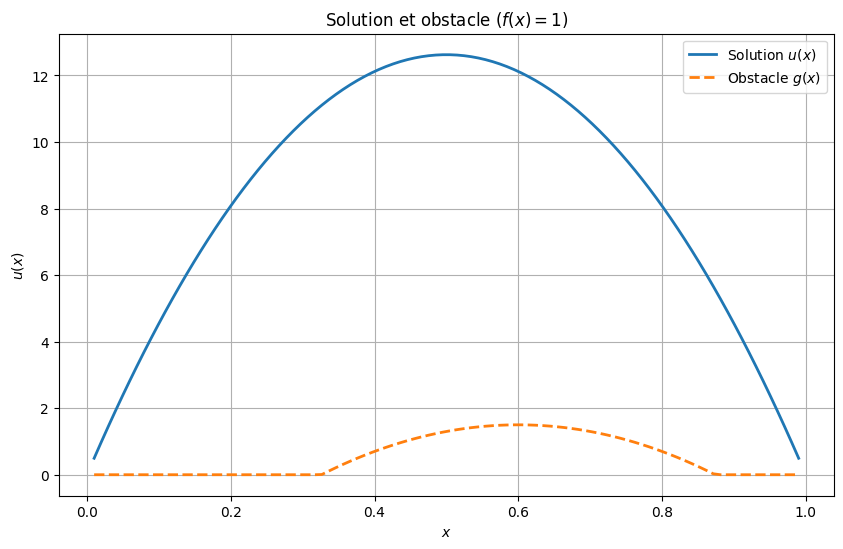

Optimization terminated successfully    (Exit mode 0)
            Current function value: -25171.988078117232
            Iterations: 4
            Function evaluations: 4
            Gradient evaluations: 4


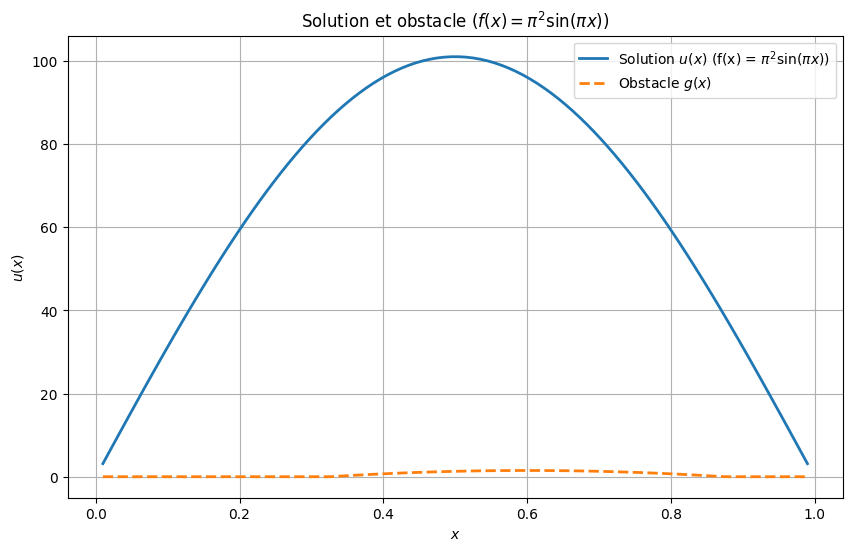

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Définition des fonctions f(x) et g(x)
def f_const(x):
    """f(x) = 1"""
    return np.ones_like(x)

def f_sin(x):
    """f(x) = π² sin(πx)"""
    return (np.pi ** 2) * np.sin(np.pi * x)

def g(x):
    """g(x) = max(1.5 - 20(x - 0.6)², 0)"""
    return np.maximum(1.5 - 20 * (x - 0.6) ** 2, 0)

# Fonctionnelle J_n
def J(u, A, fx):
    return 0.5 * np.dot(u,np.dot(A,u)) - np.dot( fx , u)

def DJ(u, A, fx):
    return np.dot(A,u) - fx

# Paramètres
n = 100  # Nombre de points de discrétisation
x = np.linspace(0, 1, n + 2)  # Points de discrétisation (incluant 0 et 1)
xv = x[1:-1]  # Points internes [x1, ..., xn]

# Tests avec f(x) = 1
fv = f_const(xv)  # Valeurs de f(x)
gv = g(xv)        # Valeurs de g(x)

# Construction de la matrice tridiagonale A
h = 1 / (n + 1)
A = (n + 1) * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))

# Fonctionnelle et gradient pour scipy.optimize.minimize
Jf = lambda u: J(u, A, fv)
DJf = lambda u: DJ(u, A, fv)

# Contraintes (u_i >= g(x_i))
constraints = ({
    'type': 'ineq',
    'fun': lambda u: u - gv,
    'jac': lambda u: np.eye(len(u))
})

# Résolution du problème
u0 = np.zeros(n)  # Initialisation
res = minimize(Jf, u0, method='SLSQP', jac=DJf, constraints=constraints,
               tol=1e-8, options={'disp': True, 'maxiter': 5000})

# Résultat
solution = res.x

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(xv, solution, label="Solution $u(x)$", linewidth=2)
plt.plot(xv, gv, label="Obstacle $g(x)$", linestyle="--", linewidth=2)
plt.xlabel("$x$")
plt.ylabel("$u(x)$")
plt.title("Solution et obstacle ($f(x) = 1$)")
plt.legend()
plt.grid()
plt.show()

# Test avec f(x) = π² sin(πx)
fv_sin = f_sin(xv)
Jf_sin = lambda u: J(u, A, fv_sin)
DJf_sin = lambda u: DJ(u, A, fv_sin)

res_sin = minimize(Jf_sin, u0, method='SLSQP', jac=DJf_sin, constraints=constraints,
                   tol=1e-8, options={'disp': True, 'maxiter': 5000})

solution_sin = res_sin.x

# Visualisation pour f(x) = π² sin(πx)
plt.figure(figsize=(10, 6))
plt.plot(xv, solution_sin, label="Solution $u(x)$ (f(x) = $\pi^2 \sin(\pi x)$)", linewidth=2)
plt.plot(xv, gv, label="Obstacle $g(x)$", linestyle="--", linewidth=2)
plt.xlabel("$x$")
plt.ylabel("$u(x)$")
plt.title("Solution et obstacle ($f(x) = \pi^2 \sin(\pi x)$)")
plt.legend()
plt.grid()
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: -4.912855667059106
            Iterations: 17
            Function evaluations: 29
            Gradient evaluations: 17
Optimization terminated successfully    (Exit mode 0)
            Current function value: -108.333333329269
            Iterations: 54
            Function evaluations: 152
            Gradient evaluations: 54
Optimization terminated successfully    (Exit mode 0)
            Current function value: -424.9999999967861
            Iterations: 106
            Function evaluations: 305
            Gradient evaluations: 106
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1683.3333333294452
            Iterations: 206
            Function evaluations: 776
            Gradient evaluations: 206


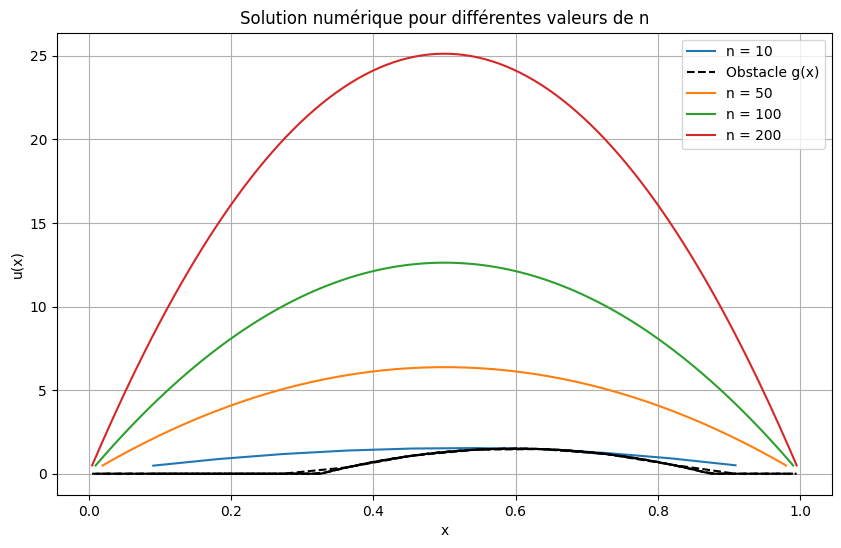

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Définir f(x), g(x) et les fonctions de la solution
def f(x):
    return np.ones_like(x)  # f(x) = 1 pour cette question

def g(x):
    return np.maximum(1.5 - 20 * (x - 0.6)**2, 0)  # Fonction obstacle

def J(U, A, fx):
    return 0.5 * np.dot(U.T, np.dot(A, U)) - np.dot(U, fx)

def DJ(U, A, fx):
    return np.dot(A, U) - fx

# Discrétisation
def solve_minimization(n):
    x = np.linspace(0, 1, n+2)  # Points de discrétisation
    xv = x[1:-1]  # Points internes
    fv, gv = f(xv), g(xv)  # f(x) et g(x) aux points internes
    
    # Matrice A pour la discrétisation
    h = 1 / (n + 1)
    A = (n+1) * (2 * np.eye(n) - np.diag(np.ones(n-1), -1) - np.diag(np.ones(n-1), 1))
    
    # Fonctions J et DJ
    Jf = lambda u: J(u, A, fv)
    DJf = lambda u: DJ(u, A, fv)
    
    # Contrainte
    const = ({'type': 'ineq', 'fun': lambda u: u - gv, 'jac': lambda u: np.eye(np.size(u))})
    
    # Résolution avec scipy.optimize.minimize
    u_initial = np.zeros(n)
    res = minimize(Jf, u_initial, method='SLSQP', jac=DJf, constraints=const, tol=1e-8, options={'disp': True, 'maxiter': 5000})
    
    return res.x, x, gv

# Tester pour différentes valeurs de n
n_values = [10, 50, 100, 200]  # Valeurs de n à tester
plt.figure(figsize=(10, 6))

for n in n_values:
    u_solution, x, gv = solve_minimization(n)
    plt.plot(x[1:-1], u_solution, label=f'n = {n}')
    plt.plot(x[1:-1], gv, 'k--', label="Obstacle g(x)" if n == 10 else "")  # Tracer l'obstacle

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution numérique pour différentes valeurs de n')
plt.legend()
plt.grid(True)
plt.show()


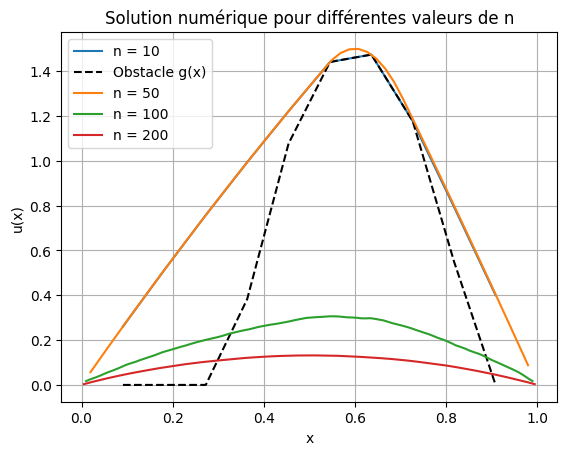

n = 10: Conditions aux bords: True, -u''(x) >= f(x): False, u(x) >= g(x): False, Complémentarité: False
n = 50: Conditions aux bords: True, -u''(x) >= f(x): False, u(x) >= g(x): False, Complémentarité: False
n = 100: Conditions aux bords: True, -u''(x) >= f(x): False, u(x) >= g(x): False, Complémentarité: False
n = 200: Conditions aux bords: True, -u''(x) >= f(x): False, u(x) >= g(x): False, Complémentarité: False


In [5]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Définir f(x) et g(x)
def f(x):
    return np.ones_like(x)  # f(x) = 1

def g(x):
    return np.maximum(1.5 - 20 * (x - 0.6)**2, 0)  # Obstacle g(x)

# Définir les fonctions J et DJ
def J(U, A, fx):
    return 0.5 * np.dot(U.T, np.dot(A, U)) - np.dot(U, fx)

def DJ(U, A, fx):
    return np.dot(A, U) - fx

# Résolution du problème pour un n donné
def solve_minimization(n):
    x = np.linspace(0, 1, n+2)
    h = 1 / (n+1)
    xv = x[1:-1]  # Points internes
    fv, gv = f(xv), g(xv)

    # Construction de la matrice A pour la discrétisation
    A = (n+1)**2 * (2 * np.eye(n) - np.diag(np.ones(n-1), -1) - np.diag(np.ones(n-1), 1))

    # Définir les fonctions J et DJ
    Jf = lambda u: J(u, A, fv)
    DJf = lambda u: DJ(u, A, fv)

    # Contrainte
    const = ({'type': 'ineq', 'fun': lambda u: u - gv, 'jac': lambda u: np.eye(np.size(u))})

    # Résolution
    u_initial = np.zeros(n)
    res = minimize(Jf, u_initial, method='SLSQP', jac=DJf, constraints=const, tol=1e-8, options={'disp': False})
    return res.x, x, gv, fv, h

# Vérification des propriétés
def verify_properties(u, x, fv, gv, h):
    n = len(u)
    u_extended = np.zeros(n+2)
    u_extended[1:-1] = u  # Ajouter les conditions aux bords

    # Calcul des dérivées secondes
    u_second = (u_extended[:-2] - 2*u_extended[1:-1] + u_extended[2:]) / h**2

    # Vérifications
    conditions_bords = np.isclose(u_extended[0], 0) and np.isclose(u_extended[-1], 0)
    condition1 = np.all(-u_second >= fv)  # -u''(x) >= f(x)
    condition2 = np.all(u >= gv)         # u(x) >= g(x)
    complementarity = np.all(np.isclose((-u_second - fv) * (u - gv), 0))

    return conditions_bords, condition1, condition2, complementarity

# Tester pour différentes valeurs de n
n_values = [10, 50, 100, 200]
results = []

for n in n_values:
    u_solution, x, gv, fv, h = solve_minimization(n)
    conditions = verify_properties(u_solution, x, fv, gv, h)
    results.append((n, conditions))
    plt.plot(x[1:-1], u_solution, label=f'n = {n}')
    if n == n_values[0]:
        plt.plot(x[1:-1], gv, 'k--', label='Obstacle g(x)')

plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution numérique pour différentes valeurs de n')
plt.legend()
plt.grid(True)
plt.show()

# Afficher les résultats des vérifications
for n, (bord, cond1, cond2, comp) in results:
    print(f"n = {n}: Conditions aux bords: {bord}, -u''(x) >= f(x): {cond1}, u(x) >= g(x): {cond2}, Complémentarité: {comp}")


In [6]:
import numpy as np

def projK(u, gn):
    """
    Projette le vecteur u sur l'ensemble Kn défini par g_i \leq u_i pour tout i.

    Paramètres :
    - u : numpy array, vecteur à projeter.
    - gn : numpy array, vecteur des contraintes g(xi).

    Retourne :
    - numpy array, projection de u sur Kn.
    """
    return np.maximum(gn, u)

# Exemple d'utilisation
if __name__ == "__main__":
    u = np.array([0.5, 1.2, 0.8, -0.3])  # Exemple de vecteur u
    gn = np.array([0.0, 1.0, 0.5, 0.2])  # Contraintes g_i
    projected_u = projK(u, gn)
    print("Vecteur original u :", u)
    print("Contraintes gn :", gn)
    print("Projection de u sur Kn :", projected_u)


Vecteur original u : [ 0.5  1.2  0.8 -0.3]
Contraintes gn : [0.  1.  0.5 0.2]
Projection de u sur Kn : [0.5 1.2 0.8 0.2]


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\21625\AppData\Local\Temp\ipykernel_21756\1074568789.py:4: SyntaxWarning: invalid escape sequence '\l'
  """


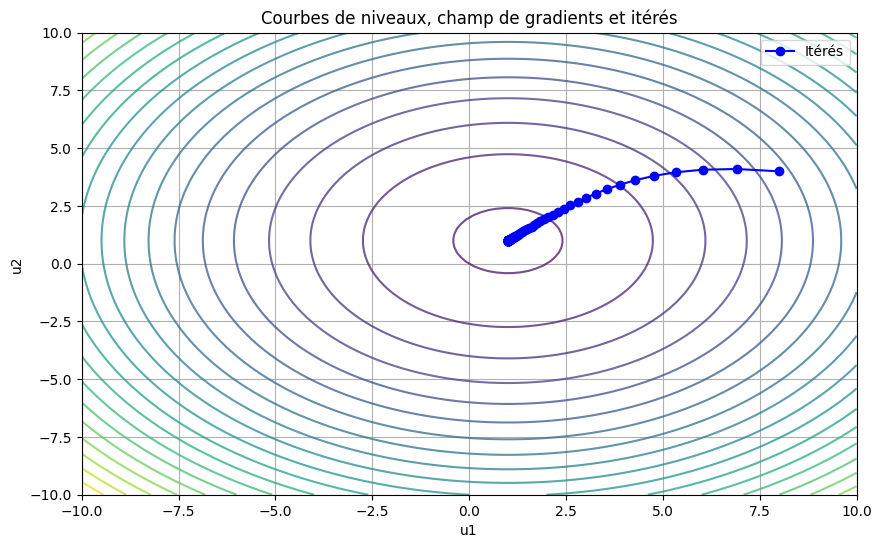

In [7]:
#pour n = 2
import numpy as np
import matplotlib.pyplot as plt

def projK(u, gn):
    """
    Projette le vecteur u sur l'ensemble Kn défini par g_i ≤ u_i pour tout i.
    """
    return np.maximum(gn, u)

def gradient_projete_pas_fixe(J, DJ, gn, u0, rho, Tol, iterMax, store):
    """
    Algorithme de gradient projeté avec pas fixe.
    """
    u = u0.copy()
    if store:
        u_list = [u.copy()]

    for k in range(iterMax):
        grad = DJ(u)
        u_new = projK(u - rho * grad, gn)

        if np.linalg.norm(u_new - u) < Tol:  # Critère d'arrêt
            u = u_new
            if store:
                u_list.append(u.copy())
            break

        u = u_new
        if store:
            u_list.append(u.copy())

    if store:
        return np.array(u_list), k + 1
    else:
        return u, k + 1
    

# Exemple d'utilisation avec des fonctions fictives J et DJ
def J2(u, A, fx):
    """
    Exemple de fonctionnelle à minimiser :
    J(u) = 0.5 * u^T * A * u - f(x)^T * u
    """
    return 0.5 * np.dot(u.T, np.dot(A, u)) - np.dot(fx, u)

def DJ2(u, A, fx):
    """
    Gradient de la fonctionnelle J :
    DJ(u) = A * u - f(x)
    """
    return np.dot(A, u) - fx

if __name__ == "__main__":
    # Paramètres du problème
    n = 2
    gn = np.array([-10, -10])
    u0 = np.array([8, 4])
    rho = 0.1
    Tol = 10**-5
    iterMax = 1000

    # Définir A et fx pour le problème spécifique
    A = np.array([[2, -1], [-1, 2]])  # Matrice définie positive
    fx = np.array([1, 1])  # Exemple de f(x)

    # Lambda pour encapsuler A et fx dans les fonctions J2 et DJ2
    J_func = lambda u: J2(u, A, fx)
    DJ_func = lambda u: DJ2(u, A, fx)

    # Exécution de l'algorithme de gradient projeté
    u_list, iter_count = gradient_projete_pas_fixe(J_func, DJ_func, gn, u0, rho, Tol, iterMax, store=1)

    # Tracé des courbes de niveaux et du champ de vecteurs
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = 0.5 * (X**2 + Y**2) - X - Y  # Exemple de courbes de niveaux

    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=20, cmap="viridis", alpha=0.75)

    # Champ de vecteurs du gradient
    U, V = 2 * X - 1, 2 * Y - 1  # Gradient de l'exemple
    plt.quiver(X, Y, U, V, color="white", alpha=0.5)

    # Tracé des itérés
    u_array = np.array(u_list)
    plt.plot(u_array[:, 0], u_array[:, 1], '-o', label="Itérés", color="blue")

    plt.xlabel("u1")
    plt.ylabel("u2")
    plt.title("Courbes de niveaux, champ de gradients et itérés")
    plt.legend()
    plt.grid()
    plt.show()


n = 5, iterations = 194, time = 0.0052 s
n = 20, iterations = 1000, time = 0.0050 s
n = 50, iterations = 1000, time = 0.0100 s
n = 100, iterations = 1000, time = 0.0060 s


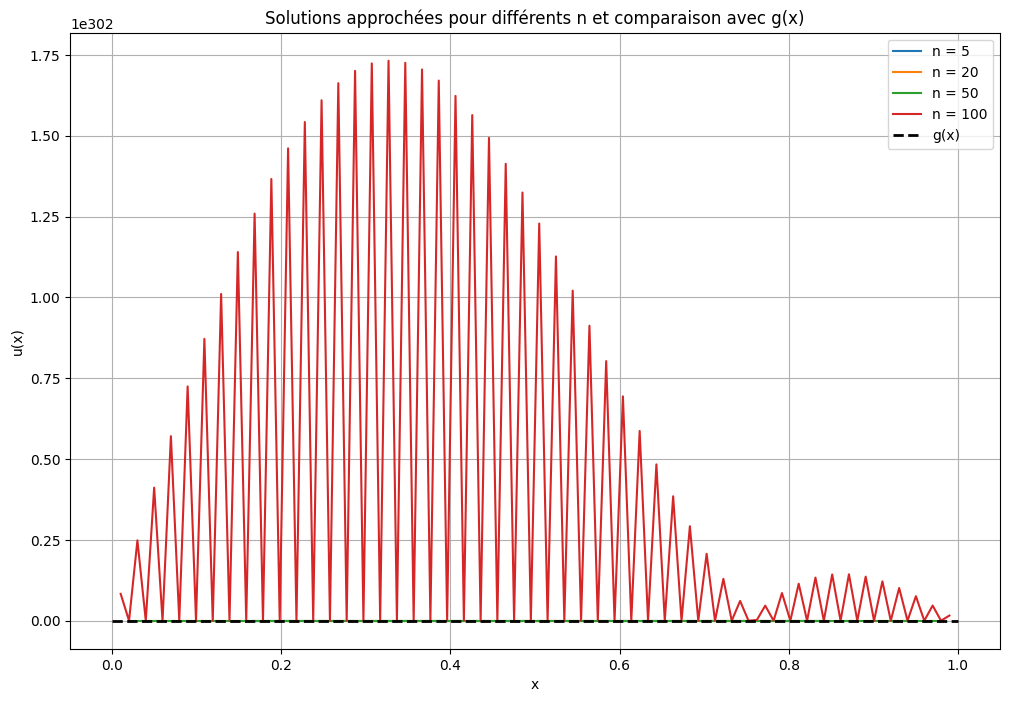

In [8]:
# pour different n
import numpy as np
import matplotlib.pyplot as plt
import time

def projK(u, gn):
    """Projette le vecteur u sur l'ensemble Kn défini par g_i ≤ u_i pour tout i."""
    return np.maximum(gn, u)

def gradient_projete_pas_fixe(J, DJ, gn, u0, rho, Tol, iterMax, store):
    """Algorithme de gradient projeté avec pas fixe."""
    u = u0.copy()
    if store:
        u_list = [u.copy()]

    for k in range(iterMax):
        grad = DJ(u)
        u_new = projK(u - rho * grad, gn)

        if np.linalg.norm(u_new - u) < Tol:  # Critère d'arrêt
            u = u_new
            if store:
                u_list.append(u.copy())
            break

        u = u_new
        if store:
            u_list.append(u.copy())

    if store:
        return np.array(u_list), k + 1
    else:
        return u, k + 1

# Fonctionnelle J et son gradient DJ
def J(u, A, fx):
    return (1 / h) * np.dot(u.T, np.dot(A, u)) - np.dot(fx, u)

def DJ(u, A, fx):
    return np.dot(A, u) - fx

# Définir les paramètres communs
rho = 0.01
h = 1 / (n+1)
Tol = 10**-5
iterMax = 1000

# Fonction g(x)
def g(x):
    return np.maximum(1.5 - 20 * (x - 0.6)**2, 0)

# Valeurs de n à tester
n_values = [5, 20, 50, 100]

# Initialisation du tracé
plt.figure(figsize=(12, 8))

for n in n_values:
    # Discrétisation
    x = np.linspace(0, 1, n + 2)  # Points xi
    xv = x[1:-1]  # Points internes
    gn = g(xv)  # Valeurs de g(x) aux points xi
    fx = np.ones(n)  # Exemple de f(x) = 1
    A = (n + 1) * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))  # Matrice

    # Initialisation de u0
    u0 = np.zeros(n)

    # Exécution et mesure du temps
    start_time = time.time()
    u, iterations = gradient_projete_pas_fixe(
        lambda u: J(u, A, fx),
        lambda u: DJ(u, A, fx),
        gn,
        u0,
        rho,
        Tol,
        iterMax,
        store=0
    )
    elapsed_time = time.time() - start_time

    # Afficher les résultats
    print(f"n = {n}, iterations = {iterations}, time = {elapsed_time:.4f} s")

    # Tracer les solutions
    plt.plot(xv, u, label=f"n = {n}")

# Tracer la fonction g(x)
x_dense = np.linspace(0, 1, 1000)
plt.plot(x_dense, g(x_dense), '--', label="g(x)", color="black", linewidth=2)

# Finaliser le tracé
plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Solutions approchées pour différents n et comparaison avec g(x)")
plt.legend()
plt.grid()
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.921990740740732
            Iterations: 10
            Function evaluations: 15
            Gradient evaluations: 10
Pour n = 5, aucune violation de (-u_xx - f_val)*(u[1:-1] - g_val) == 0.
Pour n = 5, violation détectée aux points : [0.5        0.66666667]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.183142675540745
            Iterations: 25
            Function evaluations: 51
            Gradient evaluations: 25
Pour n = 20, aucune violation de (-u_xx - f_val)*(u[1:-1] - g_val) == 0.
Pour n = 20, aucune violation de u(x) >= g(x).
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.2050015801402925
            Iterations: 52
            Function evaluations: 132
            Gradient evaluations: 52
Pour n = 50, aucune violation de (-u_xx - f_val)*(u[1:-1] - g_val) == 0.
Pour n = 50, aucune violation de u(x) 

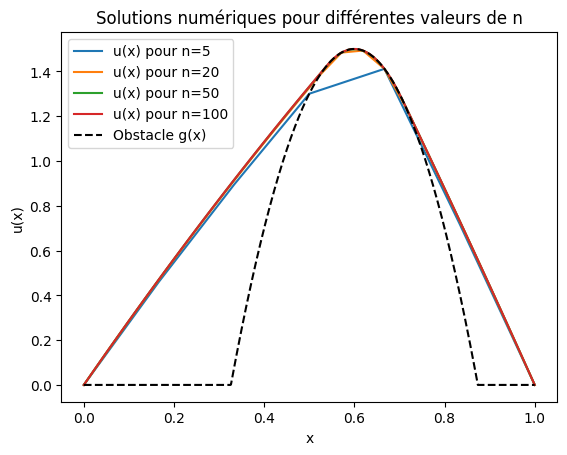

In [9]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Définir f(x) et g(x)
def f(x):
    return np.ones_like(x)

def g(x):
    return np.maximum(1.5 - 20 * (x - 0.6)**2, 0)

# Définir les fonctions J et DJ
def J(u, A, f_val):
    h = 1/(n+1)
    return (0.5) * (u.T @ A @ u) - h*f_val @ u

def DJ(u, A, f_val):
    h = 1/(n+1)
    return A @ u - (h*f_val)

# Vérification des propriétés
def check_properties(u, xv, n, f, g):
    h = 1 / (n + 1)
    u_xx = (u[:-2] - 2 * u[1:-1] + u[2:]) / h**2  # Approximation de -u''(x)
    f_val = f(xv)
    g_val = g(xv)
    

    prop1 = np.allclose(u[0], 0) and np.allclose(u[-1], 0)  # u(0) = u(1) = 0
    prop2 = np.all(-u_xx >= f_val - 1e-3 )  # -u''(x) >= f(x)
    prop3 = np.all(u[1:-1] >= g_val)  # u(x) >= g(x)
    prop4 = np.allclose( (-u_xx - f_val )*(u[1:-1] - g_val) , 0, rtol=1e-2, atol=1e-3)       #Complémentarité
    violations = xv[(-u_xx - f_val)*(u[1:-1] - g_val) == 0]
    if len(violations) > 0:
        print(f"Pour n = {n}, violation détectée aux points : {violations}")
    else:
        print(f"Pour n = {n}, aucune violation de (-u_xx - f_val)*(u[1:-1] - g_val) == 0.")

    return prop1, prop2, prop3, prop4

# Résolution pour différentes valeurs de n
n_values = [5, 20, 50, 100]
results = {}

for n in n_values:
    x = np.linspace(0, 1, n + 2)
    xv = x[1:-1]  # Points internes
    fv, gv = f(xv), g(xv)

    A = (n + 1) * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))
    Jf = lambda u: J(u, A, fv)
    DJf = lambda u: DJ(u, A, fv)

    const = ({'type': 'ineq', 'fun': lambda u: u - gv,
              'jac': lambda u: np.eye(len(u))})
    
    u0 = np.zeros(n)
    res = minimize(Jf, u0, method='SLSQP', jac=DJf, constraints=const,
                   tol=1e-12, options={'disp': True, 'maxiter': 5000})
    
    u = np.concatenate(([0], res.x, [0]))  # Ajouter les bords
    results[n] = {
        "solution": u,
        "properties": check_properties(u, xv, n, f, g),
        "x": x
    }
    # Vérification des violations
    violations = xv[res.x < gv]
    if len(violations) > 0:
        print(f"Pour n = {n}, violation détectée aux points : {violations}")
    else:
        print(f"Pour n = {n}, aucune violation de u(x) >= g(x).")


# Affichage des résultats
for n, result in results.items():
    u, props, x = result["solution"], result["properties"], result["x"]
    print(f"Pour n = {n} :")
    print(f"  u(0) = {u[0]:.5f}, u(1) = {u[-1]:.5f}")
    print(f"  Propriété 1 (u(0) = u(1) = 0) : {props[0]}")
    print(f"  Propriété 2 (-u''(x) >= f(x)) : {props[1]}")
    print(f"  Propriété 3 (u(x) >= g(x)) : {props[2]}")
    print(f"  Propriété 4 (complémentarité) : {props[3]}")

    # Tracer la solution
    plt.plot(x, u, label=f"u(x) pour n={n}")

# Tracer g(x)
x_fine = np.linspace(0, 1, 1000)
plt.plot(x_fine, g(x_fine), 'k--', label="Obstacle g(x)")

plt.xlabel("x")
plt.ylabel("u(x)")
plt.legend()
plt.title("Solutions numériques pour différentes valeurs de n")
plt.show()


C:\Users\21625\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\21625\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\21625\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


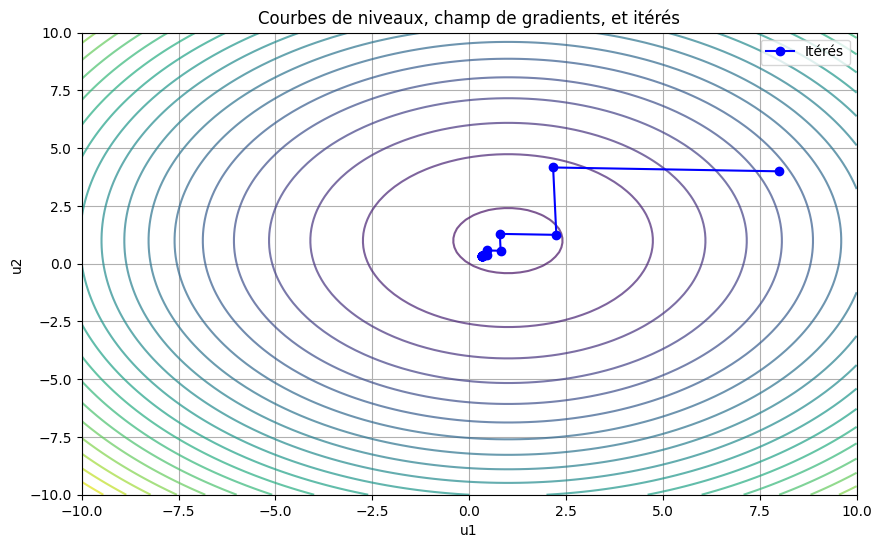

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals

# Définir J2 et son gradient DJ2
def J2(u, A, f_val):
    return 0.5 * u.T @ A @ u - f_val @ u

def DJ2(u, A, f_val):
    return A @ u - f_val

# Gradient projeté
def projK(u, gn):
    return np.maximum(gn, u)

def gradient_projete_pas_fixe_2d(J, DJ, gn, u0, rho, Tol, iterMax):
    u_list = [u0.copy()]
    u = u0.copy()
    for _ in range(iterMax):
        grad = DJ(u)
        u_new = projK(u - rho * grad, gn)
        u_list.append(u_new.copy())
        if np.linalg.norm(u_new - u) < Tol:
            break
        u = u_new
    return np.array(u_list)

# Paramètres pour n=2
n = 2
gn = np.array([-10, -10])
u0 = np.array([8, 4])
fv = np.array([1, 1])  # f(x) = 1
A = (n + 1) * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))

# Calcul des valeurs propres et rho optimal
eigenvalues = eigvals(A)
lambda_min, lambda_max = np.min(eigenvalues), np.max(eigenvalues)
rho_opt = 2 / (lambda_min + lambda_max)

# Itérés avec gradient projeté
u_list = gradient_projete_pas_fixe_2d(lambda u: J2(u, A, fv), lambda u: DJ2(u, A, fv), gn, u0, rho_opt, Tol=1e-5, iterMax=1000)

# Tracé des courbes de niveaux, champ de gradient et itérés
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = 0.5 * (X**2 + Y**2) - X - Y

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=20, cmap="viridis", alpha=0.7)
plt.quiver(X, Y, X - 1, Y - 1, color="white", alpha=0.5)  # Champ de gradients

# Tracer les itérés
plt.plot(u_list[:, 0], u_list[:, 1], '-o', label="Itérés", color="blue")
plt.xlabel("u1")
plt.ylabel("u2")
plt.title("Courbes de niveaux, champ de gradients, et itérés")
plt.legend()
plt.grid()
plt.show()


n = 5, λ_min = 1.60770+0.00000j, λ_max = 22.39230+0.00000j, ρ_opt = 0.08333+0.00000j
n = 5, iterations = 18, time = 0.0000 s
n = 20, λ_min = 0.46911+0.00000j, λ_max = 83.53089+0.00000j, ρ_opt = 0.02381+0.00000j
n = 20, iterations = 215, time = 0.0141 s
n = 50, λ_min = 0.19346+0.00000j, λ_max = 203.80654+0.00000j, ρ_opt = 0.00980+0.00000j
n = 50, iterations = 1000, time = 0.0537 s
n = 100, λ_min = 0.09771+0.00000j, λ_max = 403.90229+0.00000j, ρ_opt = 0.00495+0.00000j
n = 100, iterations = 1000, time = 0.4176 s


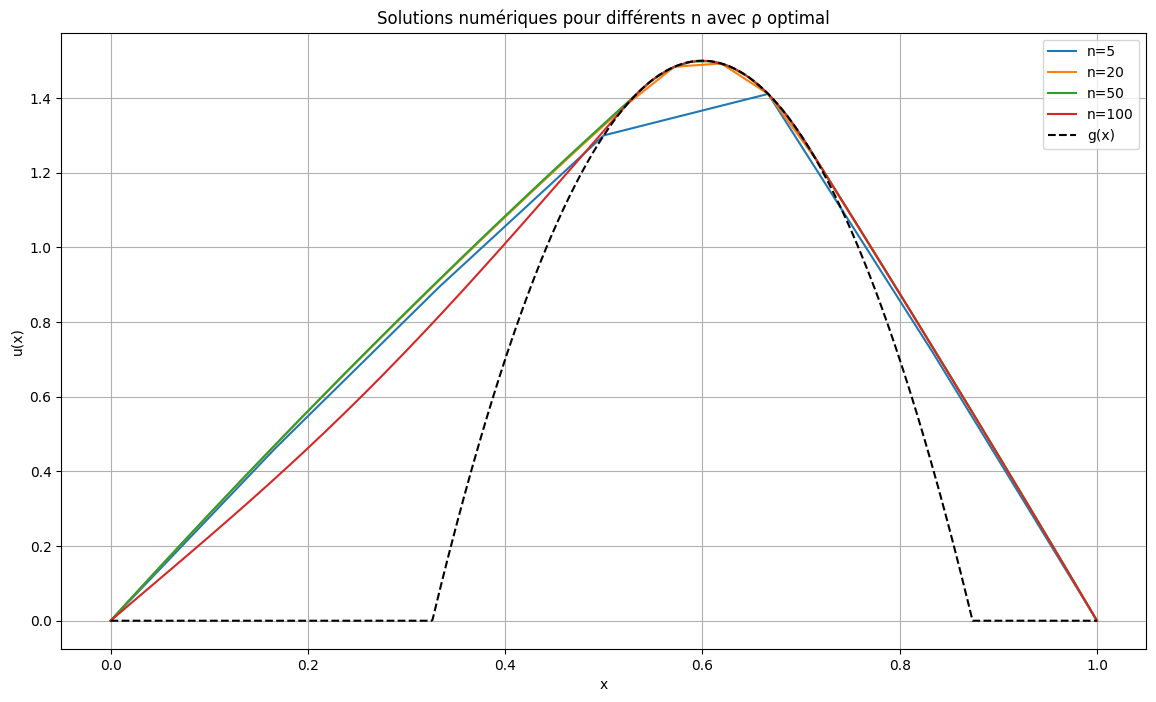

In [11]:
import time

# Gradient projeté avec stockage
def gradient_projete_pas_fixe(J, DJ, gn, u0, rho, Tol, iterMax, store):
    u = u0.copy()
    if store:
        u_list = [u.copy()]
    for k in range(iterMax):
        grad = DJ(u)
        u_new = projK(u - rho * grad, gn)
        if np.linalg.norm(u_new - u) < Tol:
            if store:
                u_list.append(u_new.copy())
            break
        u = u_new
        if store:
            u_list.append(u.copy())
    if store:
        return np.array(u_list), k + 1
    else:
        return u, k + 1

# Résolution pour différents n
n_values = [5, 20, 50, 100]
Tol = 10**-5
iterMax = 1000

plt.figure(figsize=(14, 8))

for n in n_values:
    x = np.linspace(0, 1, n + 2)
    xv = x[1:-1]
    gn = g(xv)
    fv = f(xv)

    A = (n + 1) * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))

    # Calcul des valeurs propres et rho optimal
    eigenvalues = eigvals(A)
    lambda_min, lambda_max = np.min(eigenvalues), np.max(eigenvalues)
    rho_opt = 2 / (lambda_min + lambda_max)

    u0 = np.zeros(n)

    # Mesurer le temps d'exécution
    start_time = time.time()
    u, iterations = gradient_projete_pas_fixe(
        lambda u: J(u, A, fv),
        lambda u: DJ(u, A, fv),
        gn,
        u0,
        rho_opt,
        Tol,
        iterMax,
        store=0
    )
    elapsed_time = time.time() - start_time

    print(f"n = {n}, λ_min = {lambda_min:.5f}, λ_max = {lambda_max:.5f}, ρ_opt = {rho_opt:.5f}")
    print(f"n = {n}, iterations = {iterations}, time = {elapsed_time:.4f} s")

    # Tracer les solutions obtenues
    u_full = np.concatenate(([0], u, [0]))
    plt.plot(x, u_full, label=f"n={n}")

# Tracer g(x) pour comparaison
x_fine = np.linspace(0, 1, 1000)
plt.plot(x_fine, g(x_fine), 'k--', label="g(x)")

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Solutions numériques pour différents n avec ρ optimal")
plt.legend()
plt.grid()
plt.show()


n = 5, λ_min = 1.60770+0.00000j, λ_max = 22.39230+0.00000j, ρ_opt = 0.08333+0.00000j
n = 5, iterations = 32, time = 0.0000 s
n = 20, λ_min = 0.46911+0.00000j, λ_max = 83.53089+0.00000j, ρ_opt = 0.02381+0.00000j
n = 20, iterations = 290, time = 0.0080 s
n = 50, λ_min = 0.19346+0.00000j, λ_max = 203.80654+0.00000j, ρ_opt = 0.00980+0.00000j
n = 50, iterations = 1000, time = 0.0669 s
n = 100, λ_min = 0.09771+0.00000j, λ_max = 403.90229+0.00000j, ρ_opt = 0.00495+0.00000j
n = 100, iterations = 1000, time = 1.0562 s


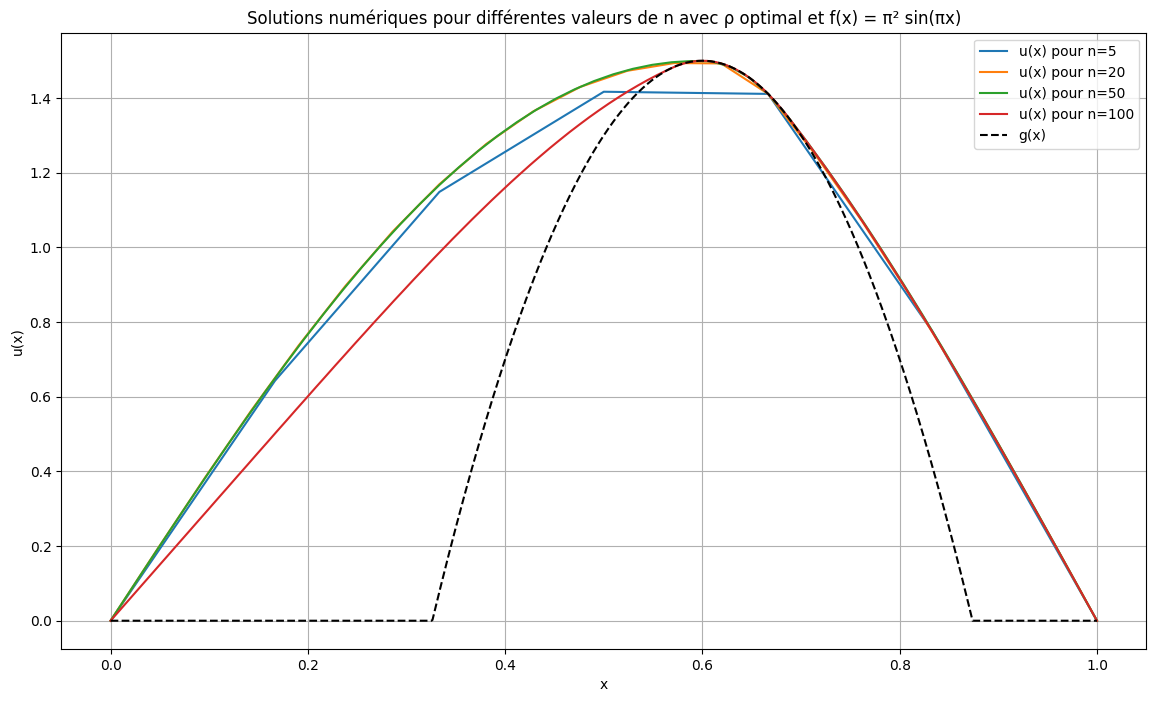

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
import time

# Définir f(x) et g(x)
def f(x):
    return np.pi**2 * np.sin(np.pi * x)

def g(x):
    return np.maximum(1.5 - 20 * (x - 0.6)**2, 0)

# Définir J et DJ
def J(u, A, f_val):
    h = 1 / (n + 1)
    return 0.5 * u.T @ A @ u - h * f_val @ u

def DJ(u, A, f_val):
    h = 1 / (n + 1)
    return A @ u - h * f_val

# Gradient projeté avec pas fixe
def gradient_projete_pas_fixe(J, DJ, gn, u0, rho, Tol, iterMax, store):
    u = u0.copy()
    if store:
        u_list = [u.copy()]
    for k in range(iterMax):
        grad = DJ(u)
        u_new = projK(u - rho * grad, gn)
        if np.linalg.norm(u_new - u) < Tol:
            if store:
                u_list.append(u_new.copy())
            break
        u = u_new
        if store:
            u_list.append(u.copy())
    if store:
        return np.array(u_list), k + 1
    else:
        return u, k + 1

# Projeter sur l'ensemble admissible
def projK(u, gn):
    return np.maximum(gn, u)

# Résolution pour différents n
n_values = [5, 20, 50, 100]
Tol = 1e-5
iterMax = 1000

plt.figure(figsize=(14, 8))

for n in n_values:
    x = np.linspace(0, 1, n + 2)
    xv = x[1:-1]
    gn = g(xv)
    fv = f(xv)

    A = (n + 1) * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))

    # Calcul des valeurs propres et rho optimal
    eigenvalues = eigvals(A)
    lambda_min, lambda_max = np.min(eigenvalues), np.max(eigenvalues)
    rho_opt = 2 / (lambda_min + lambda_max)

    u0 = np.zeros(n)

    # Mesurer le temps d'exécution
    start_time = time.time()
    u, iterations = gradient_projete_pas_fixe(
        lambda u: J(u, A, fv),
        lambda u: DJ(u, A, fv),
        gn,
        u0,
        rho_opt,
        Tol,
        iterMax,
        store=0
    )
    elapsed_time = time.time() - start_time

    print(f"n = {n}, λ_min = {lambda_min:.5f}, λ_max = {lambda_max:.5f}, ρ_opt = {rho_opt:.5f}")
    print(f"n = {n}, iterations = {iterations}, time = {elapsed_time:.4f} s")

    # Tracer les solutions obtenues
    u_full = np.concatenate(([0], u, [0]))
    plt.plot(x, u_full, label=f"u(x) pour n={n}")

# Tracer g(x) pour comparaison
x_fine = np.linspace(0, 1, 1000)
plt.plot(x_fine, g(x_fine), 'k--', label="g(x)")

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Solutions numériques pour différentes valeurs de n avec ρ optimal et f(x) = π² sin(πx)")
plt.legend()
plt.grid()
plt.show()


partie 3


In [15]:
import numpy as np

def penalisation(J, DJ, gN, eta, u0, rho, epsilon, iterMax, store):
    """
    Méthode de pénalisation pour minimiser une fonctionnelle sous contraintes.

    Paramètres :
    - J : fonctionnelle à minimiser.
    - DJ : gradient de la fonctionnelle à minimiser.
    - gN : vecteur identifiant le convexe K, i.e., K = {v : v[i] >= gN[i], i = 1 ... n}.
    - eta : paramètre de pénalisation destiné à tendre vers 0.
    - u0 : valeur initiale.
    - rho : pas fixe.
    - epsilon : test d'arrêt.
    - iterMax : nombre maximal d'itérations autorisées.
    - store : contrôle le type de stockage dans u (0 ou 1).

    Sorties :
    - u : dernier terme de la suite des itérés uk si store = 0, ou tous les termes si store = 1.
    - iter : nombre d'itérations effectuées.
    """
    def gradient_penalise(u, DJ, gN, eta):
        """
        Calcul du gradient pénalisé \nabla J_{\eta,n}(u).
        """
        grad_Jn = DJ(u)
        penalisation = -2 / eta * np.maximum(gN - u, 0)
        return grad_Jn + penalisation

    u = u0.copy()
    if store:
        u_list = [u.copy()]
    
    for k in range(iterMax):
        grad = gradient_penalise(u, DJ, gN, eta)
        u_new = u - rho * grad

        # Test d'arrêt
        if np.linalg.norm(u_new - u) < epsilon:
            u = u_new
            if store:
                u_list.append(u.copy())
            break

        u = u_new
        if store:
            u_list.append(u.copy())

    if store:
        return np.array(u_list), k + 1
    else:
        return u, k + 1

# Exemple d'utilisation de la méthode de pénalisation
if __name__ == "__main__":
    # Paramètres du problème
    n = 10
    eta = 0.1
    rho = 0.1
    epsilon = 1e-5
    iterMax = 1000
    store = 1

    # Fonction obstacle et initialisation
    gN = np.linspace(0, 1, n)
    u0 = np.zeros(n)

    # Exemple de fonctionnelle J et gradient DJ
    def J(u):
        return 0.5 * np.sum(u**2)

    def DJ(u):
        return u

    # Exécution de l'algorithme de pénalisation
    u_list, iterations = penalisation(J, DJ, gN, eta, u0, rho, epsilon, iterMax, store)

    # Affichage des résultats
    print(f"Nombre d'itérations : {iterations}")
    print("Solution finale : ", u_list[-1])


Nombre d'itérations : 1000
Solution finale :  [0.         0.11167157 0.22334313 0.3350147  0.44668627 0.55835784
 0.6700294  0.78170097 0.89337254 1.0050441 ]


<>:23: SyntaxWarning: invalid escape sequence '\e'
<>:23: SyntaxWarning: invalid escape sequence '\e'
C:\Users\21625\AppData\Local\Temp\ipykernel_21756\3798505657.py:23: SyntaxWarning: invalid escape sequence '\e'
  """


η = 1.0e+05 : 1000 itérations en 0.0110 secondes.
η = 1.0e+04 : 1000 itérations en 0.0095 secondes.
η = 1.0e+03 : 1000 itérations en 0.0070 secondes.
η = 1.0e+02 : 1000 itérations en 0.0070 secondes.
η = 1.0e+01 : 1000 itérations en 0.0080 secondes.
η = 1.0e+00 : 1000 itérations en 0.0070 secondes.
η = 1.0e-01 : 1000 itérations en 0.0070 secondes.


C:\Users\21625\AppData\Local\Temp\ipykernel_21756\3530517057.py:78: RuntimeWarning: overflow encountered in matmul
  return A @ u - h
C:\Users\21625\AppData\Local\Temp\ipykernel_21756\3530517057.py:78: RuntimeWarning: invalid value encountered in matmul
  return A @ u - h
C:\Users\21625\AppData\Local\Temp\ipykernel_21756\3530517057.py:15: RuntimeWarning: overflow encountered in multiply
  return -2 / eta * np.maximum(gN - u, 0)


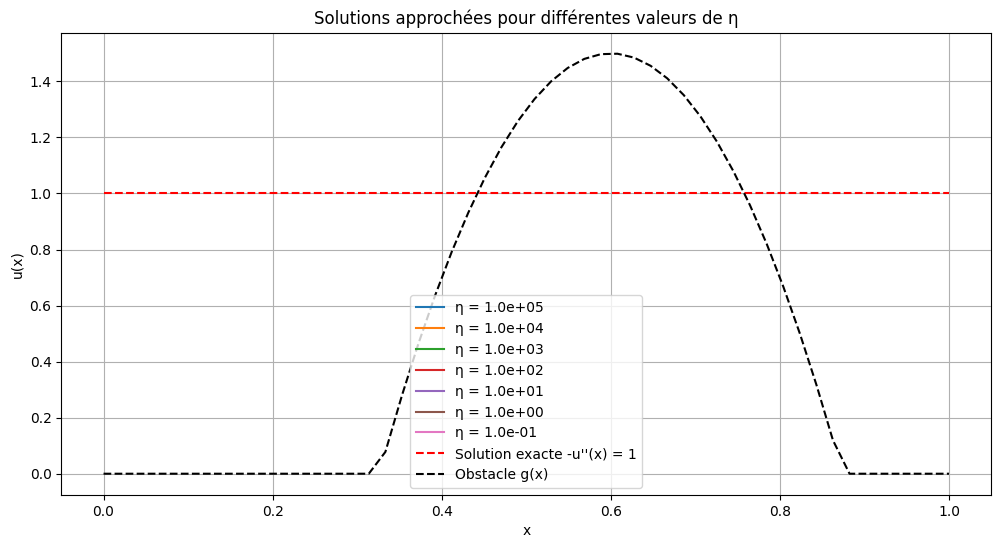

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

def penalite(u, gN, eta):
    """
    Terme de pénalisation pour le problème.
    """
    return (1 / eta) * np.sum(np.maximum(gN - u, 0)**2)

def grad_penalite(u, gN, eta):
    """
    Gradient du terme de pénalisation.
    """
    return -2 / eta * np.maximum(gN - u, 0)

def penalisation(J, DJ, gN, eta, u0, rho, epsilon, iterMax, store):
    """
    Méthode de pénalisation pour minimiser une fonctionnelle sous contraintes.

    Paramètres :
    - J : fonctionnelle à minimiser.
    - DJ : gradient de la fonctionnelle à minimiser.
    - gN : vecteur identifiant le convexe K, i.e., K = {v : v[i] >= gN[i], i = 1 ... n}.
    - eta : paramètre de pénalisation destiné à tendre vers 0.
    - u0 : valeur initiale.
    - rho : pas fixe.
    - epsilon : test d'arrêt.
    - iterMax : nombre maximal d'itérations autorisées.
    - store : contrôle le type de stockage dans u (0 ou 1).

    Sorties :
    - u : dernier terme de la suite des itérés uk si store = 0, ou tous les termes si store = 1.
    - iter : nombre d'itérations effectuées.
    """
    def gradient_penalise(u):
        """
        Gradient pénalisé : ∇Jη,n(u).
        """
        return DJ(u) + grad_penalite(u, gN, eta)

    u = u0.copy()
    if store:
        u_list = [u.copy()]
    
    for k in range(iterMax):
        grad = gradient_penalise(u)
        u_new = u - rho * grad

        # Test d'arrêt
        if np.linalg.norm(u_new - u) < epsilon:
            if store:
                u_list.append(u_new.copy())
            break

        u = u_new
        if store:
            u_list.append(u.copy())

    if store:
        return np.array(u_list), k + 1
    else:
        return u, k + 1

# Définition des fonctions J et DJ
def J(u):
    """
    Fonctionnelle Jn à minimiser.
    """
    h = 1 / (n + 1)
    return 0.5 * np.dot(u.T, A @ u) - h * np.sum(u)

def DJ(u):
    """
    Gradient de Jn.
    """
    h = 1 / (n + 1)
    return A @ u - h

# Définir g(x)
def g(x):
    return np.maximum(1.5 - 20 * (x - 0.6)**2, 0)

# Validation pour différents η
n = 50
x = np.linspace(0, 1, n + 2)
xv = x[1:-1]  # Points internes
gN = g(xv)
A = (n + 1)**2 * (2 * np.eye(n) - np.diag(np.ones(n - 1), -1) - np.diag(np.ones(n - 1), 1))
u0 = np.zeros(n)
rho = 0.1
epsilon = 1e-5
iterMax = 1000
etas = [1e5, 1e4, 1e3, 1e2, 10, 1, 0.1]

solutions = {}

plt.figure(figsize=(12, 6))

for eta in etas:
    start_time = time.time()
    
    # Calcul avec la méthode de pénalisation
    u, iterations = penalisation(J, DJ, gN, eta, u0, rho, epsilon, iterMax, store=0)
    computation_time = time.time() - start_time
    
    # Ajouter les bords à la solution
    u_full = np.concatenate(([0], u, [0]))
    solutions[eta] = u_full

    # Afficher les résultats
    print(f"η = {eta:.1e} : {iterations} itérations en {computation_time:.4f} secondes.")
    
    # Tracer la solution
    plt.plot(x, u_full, label=f"η = {eta:.1e}")

# Tracer g(x) et la solution exacte
plt.plot(x, np.ones_like(x), 'r--', label="Solution exacte -u''(x) = 1")
plt.plot(x, g(x), 'k--', label="Obstacle g(x)")

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Solutions approchées pour différentes valeurs de η")
plt.legend()
plt.grid()
plt.show()


η = 1.0e+05 : 596 itérations en 0.2287 secondes.
η = 1.0e+04 : 600 itérations en 0.2056 secondes.
η = 1.0e+03 : 628 itérations en 0.2144 secondes.
η = 1.0e+02 : 816 itérations en 0.3873 secondes.
η = 1.0e+01 : 1000 itérations en 0.4534 secondes.
η = 1.0e+00 : 1000 itérations en 0.3867 secondes.
η = 1.0e-01 : 1000 itérations en 0.3804 secondes.


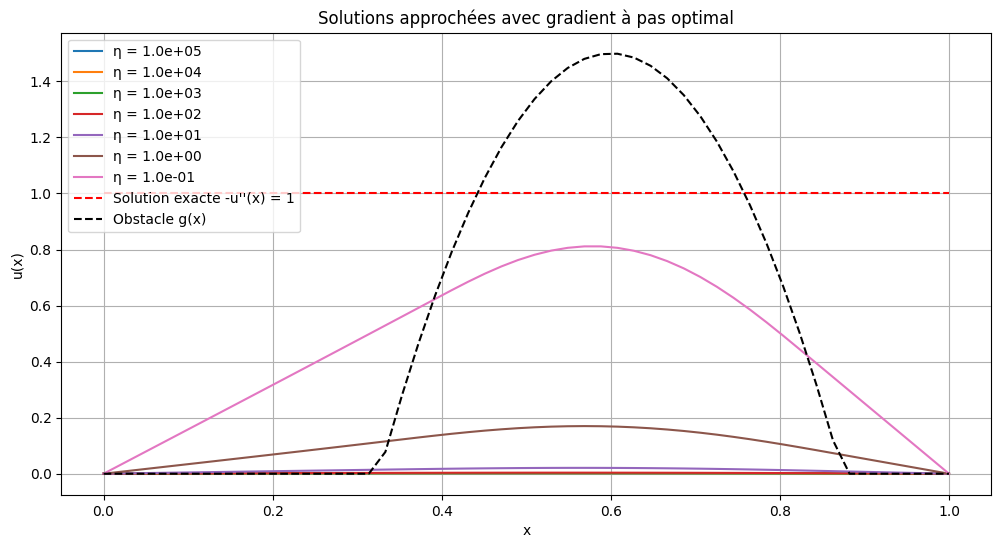

In [17]:
def pas_optimal(u, grad, J, DJ, gN, eta):
    """
    Calcule le pas optimal pour le gradient à pas optimal.
    """
    def phi(rho):
        return J(u - rho * grad) + penalite(u - rho * grad, gN, eta)
    
    # Minimisation unidimensionnelle pour trouver le pas optimal
    from scipy.optimize import minimize_scalar
    result = minimize_scalar(phi, bounds=(0, 1), method='bounded')
    return result.x

def penalisation_pas_optimal(J, DJ, gN, eta, u0, epsilon, iterMax, store):
    """
    Méthode de pénalisation avec gradient à pas optimal.
    
    Paramètres :
    - J, DJ : fonctionnelle et gradient de la fonctionnelle.
    - gN : vecteur identifiant le convexe K.
    - eta : paramètre de pénalisation.
    - u0 : valeur initiale.
    - epsilon : critère d'arrêt.
    - iterMax : nombre maximal d'itérations.
    - store : contrôle le type de stockage dans u (0 ou 1).
    
    Sorties :
    - u : solution finale ou trajectoire complète.
    - iter : nombre d'itérations effectuées.
    """
    def gradient_penalise(u):
        return DJ(u) + grad_penalite(u, gN, eta)

    u = u0.copy()
    if store:
        u_list = [u.copy()]
    
    for k in range(iterMax):
        grad = gradient_penalise(u)
        if np.linalg.norm(grad) < epsilon:
            break
        
        # Calcul du pas optimal
        rho_k = pas_optimal(u, grad, J, DJ, gN, eta)
        u_new = u - rho_k * grad

        # Vérification du critère d'arrêt
        if np.linalg.norm(u_new - u) < epsilon:
            u = u_new
            if store:
                u_list.append(u.copy())
            break
        
        u = u_new
        if store:
            u_list.append(u.copy())

    if store:
        return np.array(u_list), k + 1
    else:
        return u, k + 1

# Test et validation
etas = [1e5, 1e4, 1e3, 1e2, 10, 1, 0.1]

solutions = {}

plt.figure(figsize=(12, 6))

for eta in etas:
    start_time = time.time()
    
    # Calcul avec la méthode de pénalisation et gradient à pas optimal
    u, iterations = penalisation_pas_optimal(J, DJ, gN, eta, u0, epsilon, iterMax, store=0)
    computation_time = time.time() - start_time
    
    # Ajouter les bords à la solution
    u_full = np.concatenate(([0], u, [0]))
    solutions[eta] = u_full

    # Afficher les résultats
    print(f"η = {eta:.1e} : {iterations} itérations en {computation_time:.4f} secondes.")
    
    # Tracer la solution
    plt.plot(x, u_full, label=f"η = {eta:.1e}")

# Tracer g(x) et la solution exacte
plt.plot(x, np.ones_like(x), 'r--', label="Solution exacte -u''(x) = 1")
plt.plot(x, g(x), 'k--', label="Obstacle g(x)")

plt.xlabel("x")
plt.ylabel("u(x)")
plt.title("Solutions approchées avec gradient à pas optimal")
plt.legend()
plt.grid()
plt.show()
